In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# importing neccessary libraries
import pandas as pd #data manuplilation
import numpy as np #numerical python- linear alg clacs - matrics - vectors
import matplotlib.pyplot as plt # visualization

In [3]:
#load the dataset
df = pd.read_csv(r"C:\Users\shrey\Downloads\Crop_Yield_Prediction_India 2.csv")

In [4]:
df.head()

,Year,Crop,Rainfall_mm,Temperature_C,Fertilizer_Used_kg,Irrigation_Type,Area_hectare,Yield_tons_per_hectare
0,2016,Jowar,660.00,30.53,183.24,Rainfed,1.71,1.93
1,2024,Maize,1427.25,25.85,193.82,Drip,0.56,5.55
2,2016,Groundnut,947.88,21.22,257.61,Rainfed,9.90,8.29
3,2024,Soybean,1289.92,33.78,271.97,Rainfed,9.02,6.81
4,2015,Soybean,972.83,30.43,183.32,Sprinkler,3.01,4.25


In [5]:
df.tail()

,Year,Crop,Rainfall_mm,Temperature_C,Fertilizer_Used_kg,Irrigation_Type,Area_hectare,Yield_tons_per_hectare
95,2025,Soybean,1158.17,24.00,103.23,Drip,8.62,6.85
96,2014,Rice,1029.70,24.96,179.67,Rainfed,7.89,6.69
97,2021,Cotton,910.89,32.01,100.47,Rainfed,3.35,4.20
98,2021,Bajra,551.72,26.53,234.93,Drip,8.40,6.33
99,2021,Rice,835.94,33.95,132.09,Sprinkler,5.65,5.75


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    100 non-null    int64  
 1   Crop                    100 non-null    object 
 2   Rainfall_mm             100 non-null    float64
 3   Temperature_C           100 non-null    float64
 4   Fertilizer_Used_kg      100 non-null    float64
 5   Irrigation_Type         100 non-null    object 
 6   Area_hectare            100 non-null    float64
 7   Yield_tons_per_hectare  100 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 6.4+ KB


In [7]:
df.describe()

,Year,Rainfall_mm,Temperature_C,Fertilizer_Used_kg,Area_hectare,Yield_tons_per_hectare
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2017.500000,950.746000,27.867500,173.415900,5.497000,4.949200
std,5.038238,301.547651,4.065228,70.254288,2.915602,1.774068
min,2010.000000,418.640000,20.090000,51.500000,0.560000,0.940000
25%,2013.000000,667.277500,24.515000,111.782500,2.890000,3.745000
50%,2017.500000,958.745000,27.695000,180.705000,5.790000,5.100000
75%,2022.000000,1226.465000,31.452500,230.622500,8.147500,6.360000
max,2025.000000,1499.830000,34.470000,298.830000,9.970000,8.290000


In [8]:
df.shape

(100, 8)

In [9]:
df.isnull().sum()

Year                      0
Crop                      0
Rainfall_mm               0
Temperature_C             0
Fertilizer_Used_kg        0
Irrigation_Type           0
Area_hectare              0
Yield_tons_per_hectare    0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.columns

Index(['Year', 'Crop', 'Rainfall_mm', 'Temperature_C', 'Fertilizer_Used_kg',
       'Irrigation_Type', 'Area_hectare', 'Yield_tons_per_hectare'],
      dtype='object')

In [12]:
X = df[['Year', 'Crop', 'Rainfall_mm', 'Temperature_C', 'Fertilizer_Used_kg',
       'Irrigation_Type', 'Area_hectare']]
y = df[ 'Yield_tons_per_hectare']

In [13]:
X.shape

(100, 7)

In [14]:
y.shape

(100,)

In [43]:
# import the ML
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=42)

In [45]:
X_train.shape

(80, 7)

In [46]:
X_test.shape

(20, 7)

In [47]:
df['Yield_tons_per_hectare'].unique()

array([1.93, 5.55, 8.29, 6.81, 4.25, 2.45, 6.05, 7.59, 3.73, 7.79, 4.43,
       6.73, 3.16, 4.96, 4.35, 6.25, 5.  , 5.04, 6.12, 4.03, 5.62, 3.59,
       6.6 , 5.6 , 6.78, 5.41, 8.17, 6.45, 4.34, 6.86, 5.9 , 1.72, 1.14,
       4.08, 2.68, 5.92, 3.87, 5.83, 3.62, 5.28, 2.29, 6.97, 5.16, 2.22,
       5.84, 3.03, 5.34, 3.25, 5.77, 6.82, 4.66, 6.03, 7.07, 4.53, 5.96,
       5.03, 4.46, 4.93, 7.02, 6.47, 2.94, 4.56, 6.32, 3.75, 2.32, 6.71,
       1.48, 8.14, 6.18, 5.66, 2.37, 3.14, 2.61, 6.55, 4.59, 1.37, 2.57,
       4.01, 6.31, 6.69, 3.72, 5.44, 4.58, 3.94, 0.94, 6.46, 4.4 , 1.63,
       6.59, 7.1 , 6.27, 6.92, 6.85, 4.2 , 6.33, 5.75])

In [48]:
df.shape

(100, 8)

In [49]:
# import the ML
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [50]:
#training and test set split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=11)

In [56]:
#instantiate the model
model = LinearRegression()
model

LinearRegression()

In [57]:
X = df.drop(columns=['Yield_tons_per_hectare'])
y = df['Yield_tons_per_hectare']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=11)

In [59]:
from sklearn.model_selection import train_test_split

In [62]:
from sklearn.preprocessing import LabelEncoder

# Copy to avoid overwriting
X_train_enc = X_train.copy()
X_test_enc = X_test.copy()

# Encode all object (string) columns
for col in X_train_enc.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_train_enc[col] = le.fit_transform(X_train_enc[col])
    X_test_enc[col] = le.transform(X_test_enc[col])

# Now fit and predict
model.fit(X_train_enc, y_train)
y_pred = model.predict(X_test_enc)

print("The model predictions are:\n", y_pred)


The model predictions are:
 [5.94276983 4.42612981 4.13716967 5.84186515 3.29077591 4.9701912
 4.72627374 4.21747558 6.39299022 4.98099748 5.91680996 1.96993056
 4.86496232 4.35374825 2.30660306 7.12539099 4.50031597 6.88468847
 4.53515154 6.30438923]


In [63]:
len(y_pred)

20

In [64]:
#evaluate the model
mse = mean_squared_error(y_test, y_pred)
mse

1.6134217435622495

In [65]:
r2 = r2_score(y_test, y_pred) #performance of the model
r2

0.2150039824303922

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


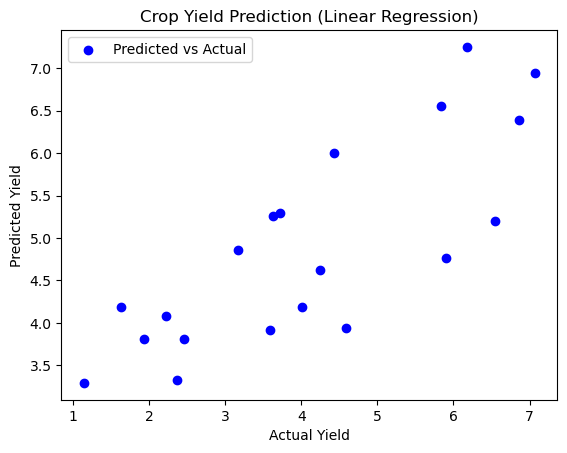

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# 1. Load dataset
df = pd.read_csv("Crop_Yield_Prediction_India 2.csv")

# 2. Encode categorical columns (convert strings → numbers)
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# 3. Define features (X) and target (y)
X = df.drop(columns=['Yield_tons_per_hectare'])
y = df['Yield_tons_per_hectare']

# 4. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Train model
model = LinearRegression()
model.fit(X_train, y_train)

# 6. Predict
y_pred = model.predict(X_test)

# 7. Visualize
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Crop Yield Prediction (Linear Regression)")
plt.legend()
plt.show()
